# NetworkX - beagle Testing
------------------

1. Test beagle implementation

### Import Libraries

In [1]:
import pandas as pd, numpy as np, networkx as nx
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import chi2
from sklearn.linear_model.logistic import LogisticRegression
pd.options.display.max_columns = 500
pd.options.display.max_colwidth = 500

/home/jake/miniconda3/envs/py3msc/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.linear_model.logistic module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)


### Load Network Data

In [2]:
df_zeek = pd.read_json("combined_zeek.log", lines = True)
df_zeek.replace('nan', np.nan, inplace=True)
print(type(df_zeek))
print(df_zeek.shape)
#print(df_zeek.EventID.value_counts())
df_zeek.head()

<class 'pandas.core.frame.DataFrame'>
(2140, 148)


@stream              @system @proc            ts                 uid  \
0    conn  bobs.bigwheel.local  zeek  1.588205e+09  Cvf4XX17hSAgXDdGEd   
1    conn  bobs.bigwheel.local  zeek  1.588205e+09  CJ21Le4zsTUcyKKi98   
2    conn  bobs.bigwheel.local  zeek  1.588205e+09  CnOP7t1eGGHf6LFfuk   
3    conn  bobs.bigwheel.local  zeek  1.588205e+09  CvxbPE3MuO7boUdSc8   
4    conn  bobs.bigwheel.local  zeek  1.588205e+09  CuRbE21APSQo2qd6rk   

  id_orig_h  id_orig_p   id_resp_h  id_resp_p proto         service  \
0  10.0.1.6    54243.0    10.0.0.4       53.0   udp             dns   
1  10.0.1.6    56880.0    10.0.0.4      445.0   tcp  gssapi,smb,krb   
2  10.0.1.6    65108.0    10.0.0.4       53.0   udp             dns   
3  10.0.1.6      138.0  10.0.1.255      138.0   udp             NaN   
4  10.0.1.6      123.0    10.0.0.4      123.0   udp             NaN   

    duration  orig_bytes  resp_bytes conn_state  missed_bytes  history  \
0   0.001528        39.0        55.0         SF           0.0       Dd   
1  10.761077      4020.0      1681.0       RSTO           0.0  ShADdaR   
2   0.001599        36.0       104.0         SF           0.0       Dd   
3        NaN         NaN         NaN         S0           0.0        D   
4   0.003069       120.0       120.0         SF           0.0       Dd   

   orig_pkts  orig_ip_bytes  resp_pkts  resp_ip_bytes       orig_l2_addr  \
0        1.0           67.0        1.0           83.0  00:0d:3a:13:e3:69   
1       12.0         1307.0       11.0         2133.0  00:0d:3a:13:e3:69   
2        1.0           64.0        1.0          132.0  00:0d:3a:13:e3:69   
3        1.0          229.0        0.0            0.0  00:0d:3a:13:e3:69   
4        1.0          148.0        1.0          148.0  00:0d:3a:13:e3:69   

        resp_l2_addr  rtt named_pipe endpoint operation  trans_id query  \
0  12:34:56:78:9a:bc  NaN        NaN      NaN       NaN       NaN   NaN   
1  12:34:56:78:9a:bc  NaN        NaN      NaN       NaN       NaN   NaN   
2  12:34:56:78:9a:bc  NaN        NaN      NaN       NaN       NaN   NaN   
3  ff:ff:ff:ff:ff:ff  NaN        NaN      NaN       NaN       NaN   NaN   
4  12:34:56:78:9a:bc  NaN        NaN      NaN       NaN       NaN   NaN   

   qclass qclass_name  qtype qtype_name  rcode rcode_name  AA  TC  RD  RA   Z  \
0     NaN         NaN    NaN        NaN    NaN        NaN NaN NaN NaN NaN NaN   
1     NaN         NaN    NaN        NaN    NaN        NaN NaN NaN NaN NaN NaN   
2     NaN         NaN    NaN        NaN    NaN        NaN NaN NaN NaN NaN NaN   
3     NaN         NaN    NaN        NaN    NaN        NaN NaN NaN NaN NaN NaN   
4     NaN         NaN    NaN        NaN    NaN        NaN NaN NaN NaN NaN NaN   

  answers TTLs  rejected analyzer failure_reason fuid tx_hosts rx_hosts  \
0     NaN  NaN       NaN      NaN            NaN  NaN      NaN      NaN   
1     NaN  NaN       NaN      NaN            NaN  NaN      NaN      NaN   
2     NaN  NaN       NaN      NaN            NaN  NaN      NaN      NaN   
3     NaN  NaN       NaN      NaN            NaN  NaN      NaN      NaN   
4     NaN  NaN       NaN      NaN            NaN  NaN      NaN      NaN   

  conn_uids source  depth analyzers mime_type filename  is_orig  seen_bytes  \
0       NaN    NaN    NaN       NaN       NaN      NaN      NaN         NaN   
1       NaN    NaN    NaN       NaN       NaN      NaN      NaN         NaN   
2       NaN    NaN    NaN       NaN       NaN      NaN      NaN         NaN   
3       NaN    NaN    NaN       NaN       NaN      NaN      NaN         NaN   
4       NaN    NaN    NaN       NaN       NaN      NaN      NaN         NaN   

   total_bytes  missing_bytes  overflow_bytes  timedout  md5 sha1  \
0          NaN            NaN             NaN       NaN  NaN  NaN   
1          NaN            NaN             NaN       NaN  NaN  NaN   
2          NaN            NaN             NaN       NaN  NaN  NaN   
3          NaN            NaN             NaN       NaN  NaN  NaN   
4          NaN     

### Load Host Data

In [3]:
df_label = pd.read_json('./df_labelled_coalesce.json', lines=True)
df_label['TP_Binary'] = df_label.TP_Label!='0'
df_label.replace('-', np.nan, inplace=True)
print(type(df_label))
print(df_label.shape)
print(df_label.EventID.value_counts())
df_label.head(1)

<class 'pandas.core.frame.DataFrame'>
(198760, 390)
12       61158
10       39286
7        20259
13       17542
4658     10973
         ...  
172          1
46           1
50103        1
306          1
41           1
Name: EventID, Length: 165, dtype: int64


@timestamp  @version                            Category  \
0  2020-05-02T03:20:47.897Z         1  Kerberos Service Ticket Operations   

    Channel  EventID    EventReceivedTime            EventTime      EventType  \
0  Security     4769  2020-05-01 23:20:47  2020-05-01 23:20:46  AUDIT_SUCCESS   

   ExecutionProcessID               Hostname        IpAddress IpPort  \
0                 704  NEWYORK.dmevals.local  ::ffff:10.0.1.4  49764   

              Keywords                               LogonGuid  \
0 -9214364837600034816  {fe5dd628-f256-ba1b-3123-bfa971bd494a}   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               Message  \
0  A Kerberos service ticket was requested.\r\n\r\nAccount Information:\r\n\tAccount Name:\t\tpbeesly@DMEVALS.LOCAL\r\n\tAccount Domain:\t\tDMEVALS.LOCAL\r\n\tLogon GUID:\t\t{fe5dd628-f256-ba1b-3123-bfa971bd494a}\r\n\r\nService Information:\r\n\tService Name:\t\tNEWYORK$\r\n\tService ID:\t\tS-1-5-21-1830255721-3727074217-2423397540-1000\r\n\r\nNetwork Information:\r\n\tClient Address:\t\t::ffff:10.0.1.4\r\n\tClient Port:\t\t49764\r\n\r\nAdditional Information:\r\n\tTicket Options:\t\t0x40800000...   

  Opcode  OpcodeValue                            ProviderGuid  RecordNumber  \
0   Info          0.0  {54849625-5478-4994-A5BA-3E3B0328C30D}        156121   

  ServiceName                                      ServiceSid Severity  \
0    NEWYORK$  S-1-5-21-1830255721-3727074217-2423397540-1000     INFO   

   SeverityValue SourceModuleName SourceModuleType  \
0              2         eventlog    im_msvistalog   

                            SourceName Status TargetDomainName  \
0  Microsoft-Windows-Security-Auditing    0x0    DMEVALS.LOCAL   

          TargetUserName   Task  ThreadID TicketEncryptionType TicketOptions  \
0  pbeesly@DMEVALS.LOCAL  14337      3504                 0x12    0x40800000   

   TransmittedServices  Version                       host   port  \
0                  NaN      0.0  wec.internal.cloudapp.net  60737   

              tags TP_Label Action ActivityID CalloutKey CalloutName  \
0  [mordorDataset]        0    NaN        NaN        NaN         NaN   

  ChangeType Conditions  FilterId FilterKey FilterName FilterType  LayerId  \
0        NaN        NaN       NaN       NaN        NaN        NaN      NaN   

  LayerKey LayerName ProcessId ProviderKey ProviderName UserName UserSid  \
0      NaN       NaN       NaN         NaN          NaN      NaN     NaN   

   Weight AccessList AccessMask AccessReason HandleId ObjectName ObjectServer  \
0     NaN        NaN        NaN          NaN      NaN        NaN          NaN   

  ObjectType PrivilegeList ProcessName  ResourceAttributes  \
0        NaN           NaN         NaN                 NaN   

   RestrictedSidCount SubjectDomainName SubjectLogonId SubjectUserName  \
0                 NaN               NaN            NaN             NaN   

  SubjectUserSid TransactionId ShareLocalPath ShareName RelativeTargetName  \
0            NaN           NaN            NaN       NaN                NaN   

  CommandLine MandatoryLabel NewProcessId NewProcessName ParentProcessName  \
0         NaN            NaN          NaN            NaN               NaN   

  TargetLogonId TargetUserSid TokenElevationType Service  \
0           NaN           NaN                NaN     NaN   

  DisabledPrivilegeList EnabledPrivilegeList CallerProcessId  \
0                   NaN                  NaN             NaN   

  CallerProcessName TargetSid AuthenticationPackageName ElevatedToken  \
0               NaN       NaN

## Host<->Network Append
------------------

In [4]:
# https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
#    In [9]: result = pd.concat([df1, df4], axis=1, sort=False)
df_label = df_label.append(df_zeek, ignore_index=True, sort=False)

In [5]:
df_label.shape

(200900, 536)

In [6]:
df_label.head(1)

@timestamp  @version                            Category  \
0  2020-05-02T03:20:47.897Z       1.0  Kerberos Service Ticket Operations   

    Channel  EventID    EventReceivedTime            EventTime      EventType  \
0  Security   4769.0  2020-05-01 23:20:47  2020-05-01 23:20:46  AUDIT_SUCCESS   

   ExecutionProcessID               Hostname        IpAddress IpPort  \
0               704.0  NEWYORK.dmevals.local  ::ffff:10.0.1.4  49764   

       Keywords                               LogonGuid  \
0 -9.214365e+18  {fe5dd628-f256-ba1b-3123-bfa971bd494a}   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               Message  \
0  A Kerberos service ticket was requested.\r\n\r\nAccount Information:\r\n\tAccount Name:\t\tpbeesly@DMEVALS.LOCAL\r\n\tAccount Domain:\t\tDMEVALS.LOCAL\r\n\tLogon GUID:\t\t{fe5dd628-f256-ba1b-3123-bfa971bd494a}\r\n\r\nService Information:\r\n\tService Name:\t\tNEWYORK$\r\n\tService ID:\t\tS-1-5-21-1830255721-3727074217-2423397540-1000\r\n\r\nNetwork Information:\r\n\tClient Address:\t\t::ffff:10.0.1.4\r\n\tClient Port:\t\t49764\r\n\r\nAdditional Information:\r\n\tTicket Options:\t\t0x40800000...   

  Opcode  OpcodeValue                            ProviderGuid  RecordNumber  \
0   Info          0.0  {54849625-5478-4994-A5BA-3E3B0328C30D}      156121.0   

  ServiceName                                      ServiceSid Severity  \
0    NEWYORK$  S-1-5-21-1830255721-3727074217-2423397540-1000     INFO   

   SeverityValue SourceModuleName SourceModuleType  \
0            2.0         eventlog    im_msvistalog   

                            SourceName Status TargetDomainName  \
0  Microsoft-Windows-Security-Auditing    0x0    DMEVALS.LOCAL   

          TargetUserName     Task  ThreadID TicketEncryptionType  \
0  pbeesly@DMEVALS.LOCAL  14337.0    3504.0                 0x12   

  TicketOptions  TransmittedServices  Version                       host  \
0    0x40800000                  NaN      0.0  wec.internal.cloudapp.net   

      port             tags TP_Label Action ActivityID CalloutKey CalloutName  \
0  60737.0  [mordorDataset]        0    NaN        NaN        NaN         NaN   

  ChangeType Conditions  FilterId FilterKey FilterName FilterType  LayerId  \
0        NaN        NaN       NaN       NaN        NaN        NaN      NaN   

  LayerKey LayerName ProcessId ProviderKey ProviderName UserName UserSid  \
0      NaN       NaN       NaN         NaN          NaN      NaN     NaN   

   Weight AccessList AccessMask AccessReason HandleId ObjectName ObjectServer  \
0     NaN        NaN        NaN          NaN      NaN        NaN          NaN   

  ObjectType PrivilegeList ProcessName  ResourceAttributes  \
0        NaN           NaN         NaN                 NaN   

   RestrictedSidCount SubjectDomainName SubjectLogonId SubjectUserName  \
0                 NaN               NaN            NaN             NaN   

  SubjectUserSid TransactionId ShareLocalPath ShareName RelativeTargetName  \
0            NaN           NaN            NaN       NaN                NaN   

  CommandLine MandatoryLabel NewProcessId NewProcessName ParentProcessName  \
0         NaN            NaN          NaN            NaN               NaN   

  TargetLogonId TargetUserSid TokenElevationType Service  \
0           NaN           NaN                NaN     NaN   

  DisabledPrivilegeList EnabledPrivilegeList CallerProcessId  \
0                   NaN                  NaN             NaN   

  CallerProcessName TargetSid AuthenticationPackageName ElevatedToken  \
0               NaN       NaN      

In [7]:
df_label.tail(1)

@timestamp  @version Category Channel  EventID EventReceivedTime  \
200899        NaN       NaN      NaN     NaN      NaN               NaN   

       EventTime EventType  ExecutionProcessID Hostname IpAddress IpPort  \
200899       NaN       NaN                 NaN      NaN       NaN    NaN   

        Keywords LogonGuid Message Opcode  OpcodeValue ProviderGuid  \
200899       NaN       NaN     NaN    NaN          NaN          NaN   

        RecordNumber ServiceName ServiceSid Severity  SeverityValue  \
200899           NaN         NaN        NaN      NaN            NaN   

       SourceModuleName SourceModuleType SourceName Status TargetDomainName  \
200899              NaN              NaN        NaN    NaN              NaN   

       TargetUserName  Task  ThreadID TicketEncryptionType TicketOptions  \
200899            NaN   NaN       NaN                  NaN           NaN   

        TransmittedServices  Version host  port tags TP_Label Action  \
200899                  NaN      NaN  NaN   NaN  NaN      NaN    NaN   

       ActivityID CalloutKey CalloutName ChangeType Conditions  FilterId  \
200899        NaN        NaN         NaN        NaN        NaN       NaN   

       FilterKey FilterName FilterType  LayerId LayerKey LayerName ProcessId  \
200899       NaN        NaN        NaN      NaN      NaN       NaN       NaN   

       ProviderKey ProviderName UserName UserSid  Weight AccessList  \
200899         NaN          NaN      NaN     NaN     NaN        NaN   

       AccessMask AccessReason HandleId ObjectName ObjectServer ObjectType  \
200899        NaN          NaN      NaN        NaN          NaN        NaN   

       PrivilegeList ProcessName  ResourceAttributes  RestrictedSidCount  \
200899           NaN         NaN                 NaN                 NaN   

       SubjectDomainName SubjectLogonId SubjectUserName SubjectUserSid  \
200899               NaN            NaN             NaN            NaN   

       TransactionId ShareLocalPath ShareName RelativeTargetName CommandLine  \
200899           NaN            NaN       NaN                NaN         NaN   

       MandatoryLabel NewProcessId NewProcessName ParentProcessName  \
200899            NaN          NaN            NaN               NaN   

       TargetLogonId TargetUserSid TokenElevationType Service  \
200899           NaN           NaN                NaN     NaN   

       DisabledPrivilegeList EnabledPrivilegeList CallerProcessId  \
200899                   NaN                  NaN             NaN   

       CallerProcessName TargetSid AuthenticationPackageName ElevatedToken  \
200899               NaN       NaN                       NaN           NaN   

       ImpersonationLevel  KeyLength LmPackageName LogonProcessName  \
200899                NaN        NaN           NaN              NaN   

        LogonType RestrictedAdminMode TargetLinkedLogonId  \
200899        NaN                 NaN                 NaN   

        TargetOutboundDomainName  TargetOutboundUserName VirtualAccount  \
200899                       NaN                     NaN            NaN   

       WorkstationName SourceHandleId SourceProcessId TargetHandleId  \
200899             NaN            NaN             NaN            NaN   

       TargetProcessId AccountName AccountType ContextInfo Domain Payload  \
200899             NaN         NaN         NaN         NaN    NaN     NaN   

       UserID  NewThreadId RuleName SourceImage SourceProcessGuid  \
200899    NaN          NaN      NaN         NaN               NaN   

       StartAddress StartFunction StartModule TargetImage TargetProcessGuid  \
200899          NaN           NaN         NaN         NaN               NaN   

       UtcTime  MessageNumber  MessageTotal Path ScriptBlockId  \
200899     NaN            NaN           NaN  NaN           NaN   

       ScriptBlockText AlgorithmName KeyName KeyType Operation ReturnCode  \
200899             NaN           NaN     NaN     NaN       NaN        NaN   

       Arc

# Normalize Timestamp, IP/Port Columns
------------------

## Common Timestamp Column

In [8]:
df_label['time_stamp'] = df_label['@timestamp'].apply(lambda x: (pd.Timestamp(x)))

In [9]:
df_label['time_stamp'] = df_label['time_stamp'].fillna(df_label['ts'].apply(lambda x: (pd.to_datetime(x, unit='s', utc=True))))

## Common IP/Port Columns

In [10]:
# Transform Host Data - Similar Data to Single Columns
df_label['Destination_IP'] = df_label['DestinationIp']
df_label['Destination_IP'] = df_label['Destination_IP'].fillna(df_label['DestAddress'])
df_label['Source_IP'] = df_label['IpAddress']
df_label['Source_IP'] = df_label['Source_IP'].fillna(df_label['SourceIp'])
df_label['Source_IP'] = df_label['Source_IP'].fillna(df_label['SourceAddress'])
df_label['Source_Port'] = df_label['IpPort']
df_label['Source_Port'] = df_label['Source_Port'].fillna(df_label['SourcePort'])
df_label['Destination_Port'] = df_label['DestinationPort']
df_label['Destination_Port'] = df_label['Destination_Port'].fillna(df_label['DestPort'])

In [11]:
# Transform Network Data - Similar Data to Single Columns
df_label['Source_IP'] = df_label['Source_IP'].fillna(df_label['id_orig_h'])
df_label['Source_Port'] = df_label['Source_Port'].fillna(df_label['id_orig_p'])
df_label['Destination_IP'] = df_label['Destination_IP'].fillna(df_label['id_resp_h'])
df_label['Destination_Port'] = df_label['Destination_Port'].fillna(df_label['id_resp_p'])

## Common Hostname/uid Column

In [12]:
df_label['Hostname_uid'] = df_label['Hostname']

In [13]:
df_label['Hostname_uid'] = df_label['Hostname_uid'].fillna(df_label['uid'])

## Beagle Column Formatting

In [14]:
df_label['EventData_ParentImage'] = df_label['ParentImage'].astype(object)
df_label['EventData_ParentProcessId'] = df_label['ParentProcessId']
df_label['EventData_ParentProcessGuid'] = df_label['ParentProcessGuid']
df_label['EventData_Image'] = df_label['Image'].astype(object)
df_label['EventData_CommandLine'] = df_label['CommandLine'].astype(object)
df_label['EventData_Hashes'] = df_label['Hashes'].astype(object)

df_label['Computer'] = df_label['Hostname'].astype(object)
df_label['EventData_User'] = df_label['User'].astype(object)
df_label['EventData_UtcTime'] = df_label['UtcTime']

df_label['EventData_ProcessGuid'] = df_label['ProcessGuid']
df_label['EventData_ProcessId'] = df_label['ProcessId']

# Testing Beagle

## Single Record

In [15]:
X = df_label.loc[(df_label['EventID']==1)]

In [16]:
X['EventData_ParentImage'] = X['ParentImage'].astype(object)
X['EventData_ParentProcessId'] = X['ParentProcessId']
X['EventData_ParentProcessGuid'] = X['ParentProcessGuid']
X['EventData_Image'] = X['Image'].astype(object)
X['EventData_CommandLine'] = X['CommandLine'].astype(object)
X['EventData_Hashes'] = X['Hashes'].astype(object)

X['Computer'] = X['Hostname']
X['EventData_User'] = X['User']
X['EventData_UtcTime'] = X['UtcTime']

X['EventData_ProcessGuid'] = X['ProcessGuid']
X['EventData_ProcessId'] = X['ProcessId']

/home/jake/miniconda3/envs/py3msc/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/jake/miniconda3/envs/py3msc/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jake/miniconda3/envs/py3msc/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [17]:
X.shape

(450, 553)

In [18]:
# remove null only columns
X = X[X.columns[~X.isnull().all()]]

In [19]:
X.shape

(450, 78)

In [20]:
from beagle.backends import NetworkX
#from beagle.datasources import JSONData
#from beagle.datasources.json_data import JSONFile
from beagle.transformers import SysmonTransformer

In [84]:
import os
import json
from typing import Dict, Generator, List

from beagle.datasources.base_datasource import DataSource
from beagle.transformers import GenericTransformer
from beagle.transformers.sysmon_transformer import SysmonTransformer

class JSONData(DataSource):
    """A generic data source which returns events one by one
    """

    name = "JSON Data"
    transformers = [SysmonTransformer]
    category = "Generic Data"

    def __init__(self, events: List[Dict]) -> None:
        self._events = events

    def events(self) -> Generator[dict, None, None]:
        for event in self._events:
            yield event

    def metadata(self) -> dict:
        return {}

In [22]:
datasource = JSONData(X.head(1).to_dict('records'))
transformer = SysmonTransformer(datasource=datasource)
nodes = transformer.run()

2020-07-01T03:58:05 | beagle.transformers.sysmon_transformer.__init__:15 | INFO | Created Sysmon Transformer.
2020-07-01T03:58:05 | beagle.transformers.base_transformer.run:111 | INFO | Finished processing of events, created 4 nodes.


In [23]:
nodes

[(<SysMonProc> process_guid={47ab858c-cadc-5eac-2200-000000000400}),
 (<File> host=SCRANTON.dmevals.local full_path=C:\Windows\System32\svchost.exe),
 (<SysMonProc> process_guid={47ab858c-e589-5eac-f803-000000000400}),
 (<File> host=SCRANTON.dmevals.local full_path=C:\Windows\System32\taskhostw.exe)]

In [24]:
backend = NetworkX(nodes=nodes)

2020-07-01T03:58:10 | beagle.backends.networkx.__init__:56 | INFO | Initialized NetworkX Backend


In [25]:
G = backend.graph()

2020-07-01T03:58:11 | beagle.backends.networkx.graph:73 | INFO | Beginning graph generation.
2020-07-01T03:58:11 | beagle.backends.networkx.graph:83 | INFO | Completed graph generation.
2020-07-01T03:58:11 | beagle.backends.networkx.graph:84 | INFO | Graph contains 4 nodes and 3 edges.


/home/jake/miniconda3/envs/py3msc/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/jake/miniconda3/envs/py3msc/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


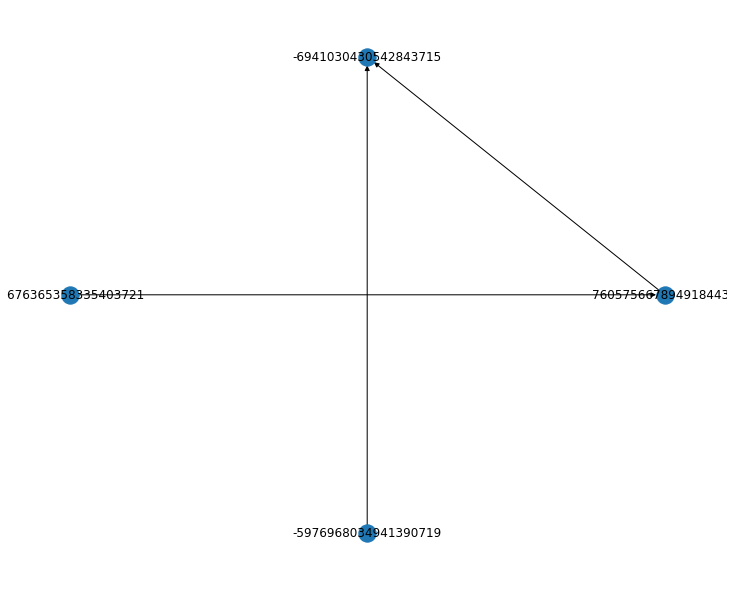

In [26]:
from matplotlib.pyplot import figure
figure(figsize=(10, 8))
nx.draw_shell(G, with_labels=True)

## 50 records

In [27]:
datasource = JSONData(X.head(50).to_dict('records'))
transformer = SysmonTransformer(datasource=datasource)
nodes = transformer.run()

2020-07-01T03:58:28 | beagle.transformers.sysmon_transformer.__init__:15 | INFO | Created Sysmon Transformer.
2020-07-01T03:58:28 | beagle.transformers.base_transformer.run:111 | INFO | Finished processing of events, created 200 nodes.


In [28]:
backend = NetworkX(nodes=nodes)

2020-07-01T03:58:35 | beagle.backends.networkx.__init__:56 | INFO | Initialized NetworkX Backend


In [29]:
G = backend.graph()

2020-07-01T03:58:36 | beagle.backends.networkx.graph:73 | INFO | Beginning graph generation.
2020-07-01T03:58:36 | beagle.backends.networkx.graph:83 | INFO | Completed graph generation.
2020-07-01T03:58:36 | beagle.backends.networkx.graph:84 | INFO | Graph contains 132 nodes and 131 edges.


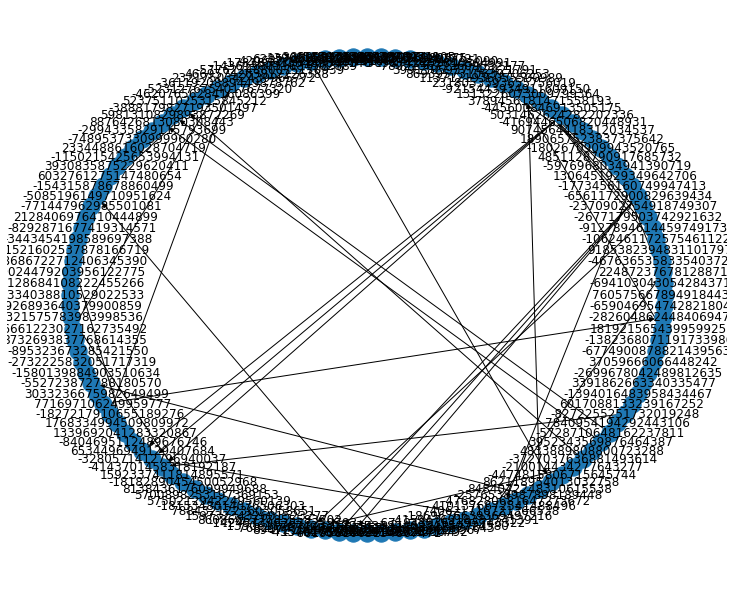

In [30]:
from matplotlib.pyplot import figure
figure(figsize=(10, 8))
nx.draw_shell(G, with_labels=True)

## All EventID 1 records

In [31]:
datasource = JSONData(X.to_dict('records'))
transformer = SysmonTransformer(datasource=datasource)
nodes = transformer.run()

2020-07-01T03:58:51 | beagle.transformers.sysmon_transformer.__init__:15 | INFO | Created Sysmon Transformer.
2020-07-01T03:58:51 | beagle.transformers.base_transformer._consumer_thread:143 | WARNING | Error when parsing event, recieved exception 'float' object has no attribute 'split'
2020-07-01T03:58:51 | beagle.transformers.base_transformer._consumer_thread:143 | WARNING | Error when parsing event, recieved exception 'float' object has no attribute 'split'
2020-07-01T03:58:51 | beagle.transformers.base_transformer._consumer_thread:143 | WARNING | Error when parsing event, recieved exception 'float' object has no attribute 'split'
2020-07-01T03:58:51 | beagle.transformers.base_transformer._consumer_thread:143 | WARNING | Error when parsing event, recieved exception 'float' object has no attribute 'split'
2020-07-01T03:58:51 | beagle.transformers.base_transformer.run:111 | INFO | Finished processing of events, created 1784 nodes.
2020-07-01T03:58:51 | beagle.transformers.base_transfor

In [32]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 450 entries, 380 to 197752
Data columns (total 78 columns):
 #   Column                       Non-Null Count  Dtype              
---  ------                       --------------  -----              
 0   @timestamp                   450 non-null    object             
 1   @version                     450 non-null    float64            
 2   Channel                      450 non-null    object             
 3   EventID                      450 non-null    float64            
 4   EventReceivedTime            450 non-null    object             
 5   EventTime                    450 non-null    object             
 6   EventType                    450 non-null    object             
 7   ExecutionProcessID           450 non-null    float64            
 8   Hostname                     450 non-null    object             
 9   Keywords                     450 non-null    float64            
 10  LogonGuid                    446 non-null    

In [33]:
backend = NetworkX(nodes=nodes)

2020-07-01T03:59:16 | beagle.backends.networkx.__init__:56 | INFO | Initialized NetworkX Backend


In [34]:
G = backend.graph()

2020-07-01T03:59:17 | beagle.backends.networkx.graph:73 | INFO | Beginning graph generation.
2020-07-01T03:59:17 | beagle.backends.networkx.graph:83 | INFO | Completed graph generation.
2020-07-01T03:59:17 | beagle.backends.networkx.graph:84 | INFO | Graph contains 628 nodes and 920 edges.


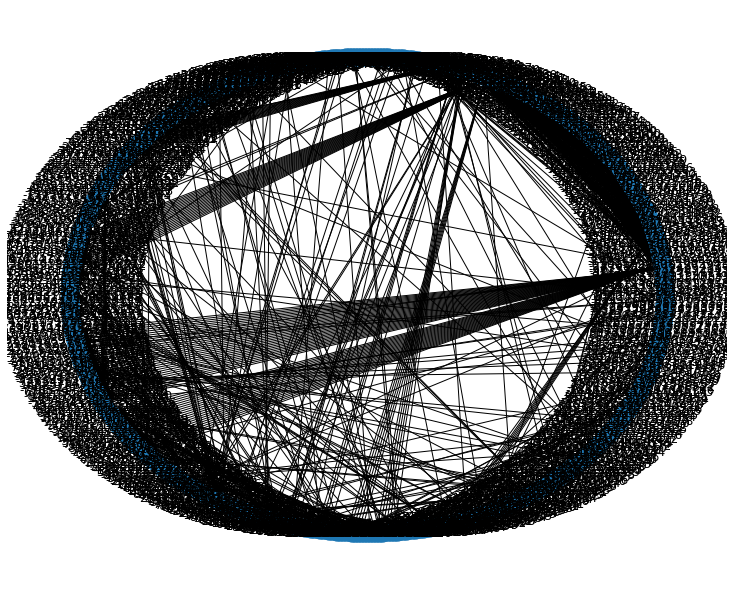

In [35]:
from matplotlib.pyplot import figure
figure(figsize=(10, 8))
nx.draw_shell(G, with_labels=True)

# New Sysmon Transformer

In [42]:
df_label['EventData_ParentImage'] = df_label['ParentImage'].astype(object)
df_label['EventData_ParentProcessId'] = df_label['ParentProcessId']
df_label['EventData_ParentProcessGuid'] = df_label['ParentProcessGuid']
df_label['EventData_Image'] = df_label['Image'].astype(object)
df_label['EventData_CommandLine'] = df_label['CommandLine'].astype(object)
df_label['EventData_Hashes'] = df_label['Hashes'].astype(object)

df_label['Computer'] = df_label['Hostname'].astype(object)
df_label['EventData_User'] = df_label['User'].astype(object)
df_label['EventData_UtcTime'] = df_label['UtcTime']

df_label['EventData_ProcessGuid'] = df_label['ProcessGuid']
df_label['EventData_ProcessId'] = df_label['ProcessId']

df_label['EventData_DestinationIp'] = df_label['DestinationIp']
df_label['EventData_DestinationPort'] = df_label['DestinationPort']
df_label['EventData_Protocol'] = df_label['Protocol']
df_label['EventData_TargetFilename'] = df_label['TargetFilename']

df_label['EventData_TargetObject'] = df_label['TargetObject']
df_label['EventData_EventType'] = df_label['EventType']
#df_label['EventData_Details'] = df_label['ProcessId']

In [38]:
X = df_label.loc[(df_label['EventID']==3)]

In [39]:
X = X[X.columns[~X.isnull().all()]]

In [40]:
X.shape

(1230, 59)

In [41]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1230 entries, 343 to 197721
Data columns (total 59 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   @timestamp             1230 non-null   object             
 1   @version               1230 non-null   float64            
 2   Channel                1230 non-null   object             
 3   EventID                1230 non-null   float64            
 4   EventReceivedTime      1230 non-null   object             
 5   EventTime              1230 non-null   object             
 6   EventType              1230 non-null   object             
 7   ExecutionProcessID     1230 non-null   float64            
 8   Hostname               1230 non-null   object             
 9   Keywords               1230 non-null   float64            
 10  Message                1230 non-null   object             
 11  Opcode                 1 non-null      object       

In [55]:
from beagle.backends import NetworkX
from beagle.transformers import SysmonTransformer

datasource = JSONData(df_label.loc[(df_label['EventID']==3)].to_dict('records'))
transformer = SysmonTransformer(datasource=datasource)

2020-07-01T04:13:52 | beagle.transformers.sysmon_transformer.__init__:15 | INFO | Created Sysmon Transformer.


In [56]:
nodes = transformer.run()

2020-07-01T04:13:53 | beagle.transformers.base_transformer._consumer_thread:143 | WARNING | Error when parsing event, recieved exception 'float' object has no attribute 'split'
2020-07-01T04:13:53 | beagle.transformers.base_transformer.run:111 | INFO | Finished processing of events, created 3687 nodes.
2020-07-01T04:13:53 | beagle.transformers.base_transformer.run:114 | WARNING | Parsing finished with errors.


In [57]:
backend = NetworkX(nodes=nodes)
G = backend.graph()

2020-07-01T04:13:58 | beagle.backends.networkx.__init__:56 | INFO | Initialized NetworkX Backend
2020-07-01T04:13:58 | beagle.backends.networkx.graph:73 | INFO | Beginning graph generation.
2020-07-01T04:13:58 | beagle.backends.networkx.graph:83 | INFO | Completed graph generation.
2020-07-01T04:13:58 | beagle.backends.networkx.graph:84 | INFO | Graph contains 188 nodes and 1575 edges.


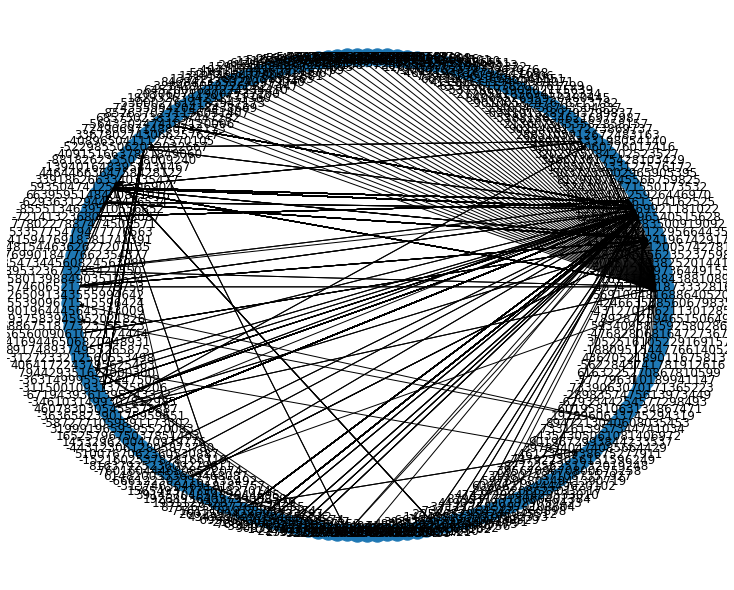

In [58]:
from matplotlib.pyplot import figure
figure(figsize=(10, 8))
nx.draw_shell(G, with_labels=True)

In [80]:
from beagle.backends import NetworkX
from beagle.transformers import SysmonTransformer

datasource = JSONData(df_label.loc[(df_label['EventID']==11)].to_dict('records'))
transformer = SysmonTransformer(datasource=datasource)

2020-07-01T04:19:31 | beagle.transformers.sysmon_transformer.__init__:15 | INFO | Created Sysmon Transformer.


In [81]:
nodes = transformer.run()

2020-07-01T04:19:32 | beagle.transformers.base_transformer._consumer_thread:143 | WARNING | Error when parsing event, recieved exception 'float' object has no attribute 'split'
2020-07-01T04:19:32 | beagle.transformers.base_transformer._consumer_thread:143 | WARNING | Error when parsing event, recieved exception 'float' object has no attribute 'split'
2020-07-01T04:19:32 | beagle.transformers.base_transformer._consumer_thread:143 | WARNING | Error when parsing event, recieved exception 'float' object has no attribute 'split'
2020-07-01T04:19:32 | beagle.transformers.base_transformer._consumer_thread:143 | WARNING | Error when parsing event, recieved exception 'float' object has no attribute 'split'
2020-07-01T04:19:32 | beagle.transformers.base_transformer.run:111 | INFO | Finished processing of events, created 4947 nodes.
2020-07-01T04:19:32 | beagle.transformers.base_transformer.run:114 | WARNING | Parsing finished with errors.


In [82]:
backend = NetworkX(nodes=nodes)
G = backend.graph()

2020-07-01T04:19:36 | beagle.backends.networkx.__init__:56 | INFO | Initialized NetworkX Backend
2020-07-01T04:19:36 | beagle.backends.networkx.graph:73 | INFO | Beginning graph generation.
2020-07-01T04:19:37 | beagle.backends.networkx.graph:83 | INFO | Completed graph generation.
2020-07-01T04:19:37 | beagle.backends.networkx.graph:84 | INFO | Graph contains 1396 nodes and 1750 edges.


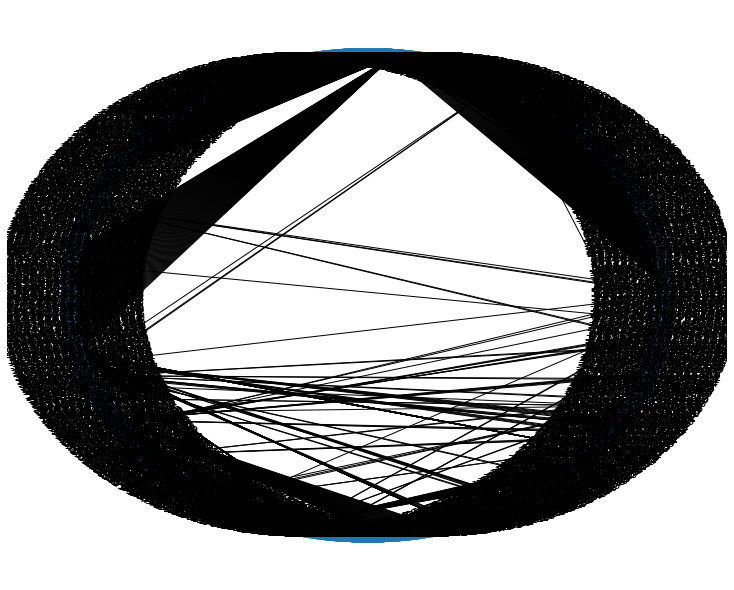

In [83]:
from matplotlib.pyplot import figure
figure(figsize=(10, 8))
nx.draw_shell(G, with_labels=True)

# Trying a Mix of EventID

In [134]:
from beagle.backends import NetworkX

NX = NetworkX.from_datasources(
    datasources=[
        JSONData(df_label.loc[(df_label['EventID']==1)].head(100).to_dict('records')),
        JSONData(df_label.loc[(df_label['EventID']==3)].head(100).to_dict('records')),
        JSONData(df_label.loc[(df_label['EventID']==11)].head(100).to_dict('records')),
    ]
)
G = NX.graph()

2020-07-01T06:52:36 | beagle.transformers.sysmon_transformer.__init__:15 | INFO | Created Sysmon Transformer.
2020-07-01T06:52:36 | beagle.transformers.base_transformer.run:111 | INFO | Finished processing of events, created 400 nodes.
2020-07-01T06:52:36 | beagle.transformers.sysmon_transformer.__init__:15 | INFO | Created Sysmon Transformer.
2020-07-01T06:52:36 | beagle.transformers.base_transformer.run:111 | INFO | Finished processing of events, created 300 nodes.
2020-07-01T06:52:36 | beagle.transformers.sysmon_transformer.__init__:15 | INFO | Created Sysmon Transformer.
2020-07-01T06:52:36 | beagle.transformers.base_transformer.run:111 | INFO | Finished processing of events, created 300 nodes.
2020-07-01T06:52:36 | beagle.backends.networkx.__init__:56 | INFO | Initialized NetworkX Backend
2020-07-01T06:52:36 | beagle.backends.networkx.graph:73 | INFO | Beginning graph generation.
2020-07-01T06:52:36 | beagle.backends.networkx.graph:83 | INFO | Completed graph generation.
2020-07-0

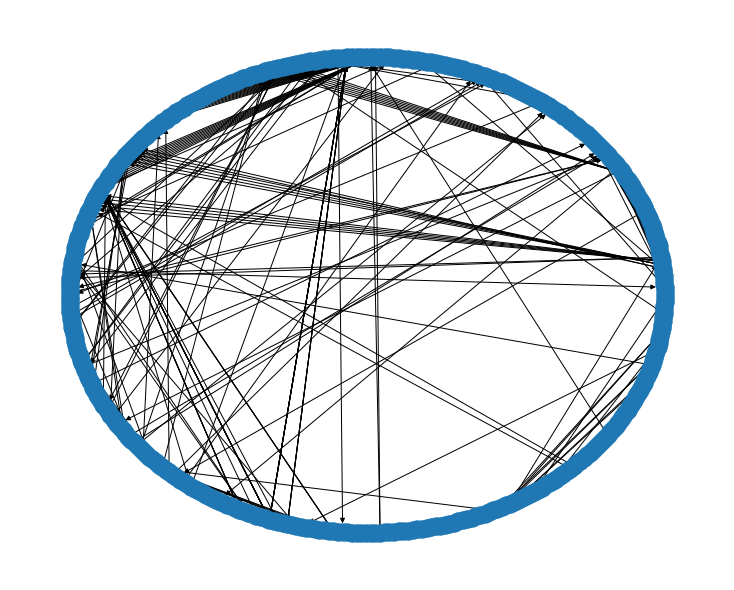

In [136]:
from matplotlib.pyplot import figure
figure(figsize=(10, 8))
nx.draw_shell(G, with_labels=False)

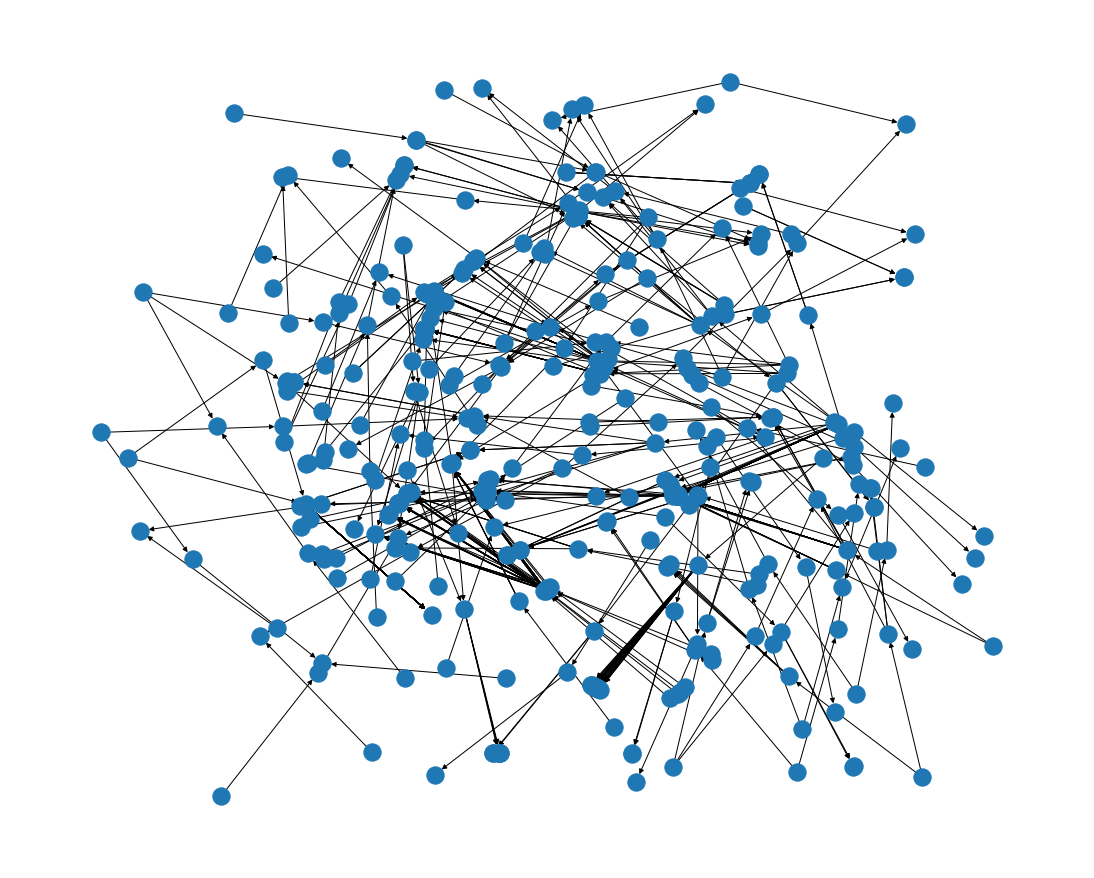

In [137]:
from matplotlib.pyplot import figure
figure(figsize=(15, 12))
nx.draw_kamada_kawai(G, with_labels=False)

/home/jake/miniconda3/envs/py3msc/lib/python3.7/site-packages/networkx/drawing/layout.py:923: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  pos = np.row_stack((pos[x] for x in node_list))


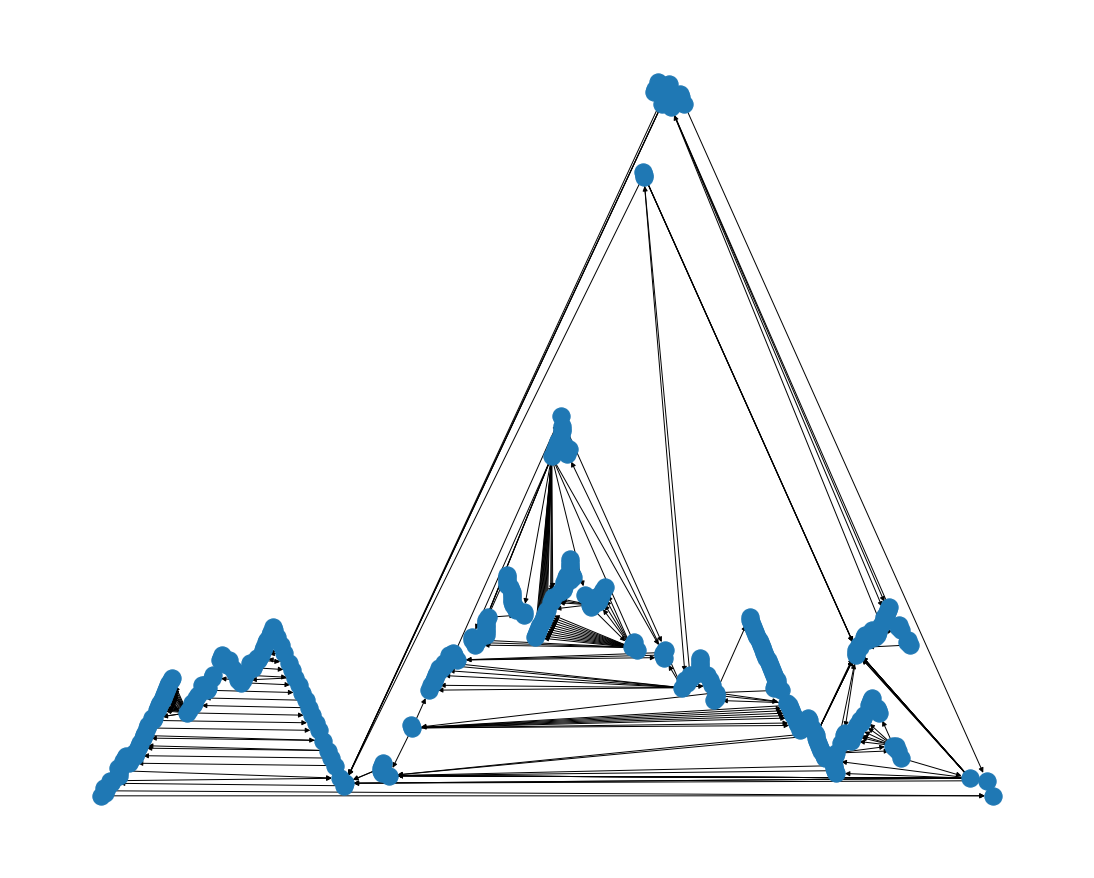

In [138]:
from matplotlib.pyplot import figure
figure(figsize=(15, 12))
nx.draw_planar(G, with_labels=False)

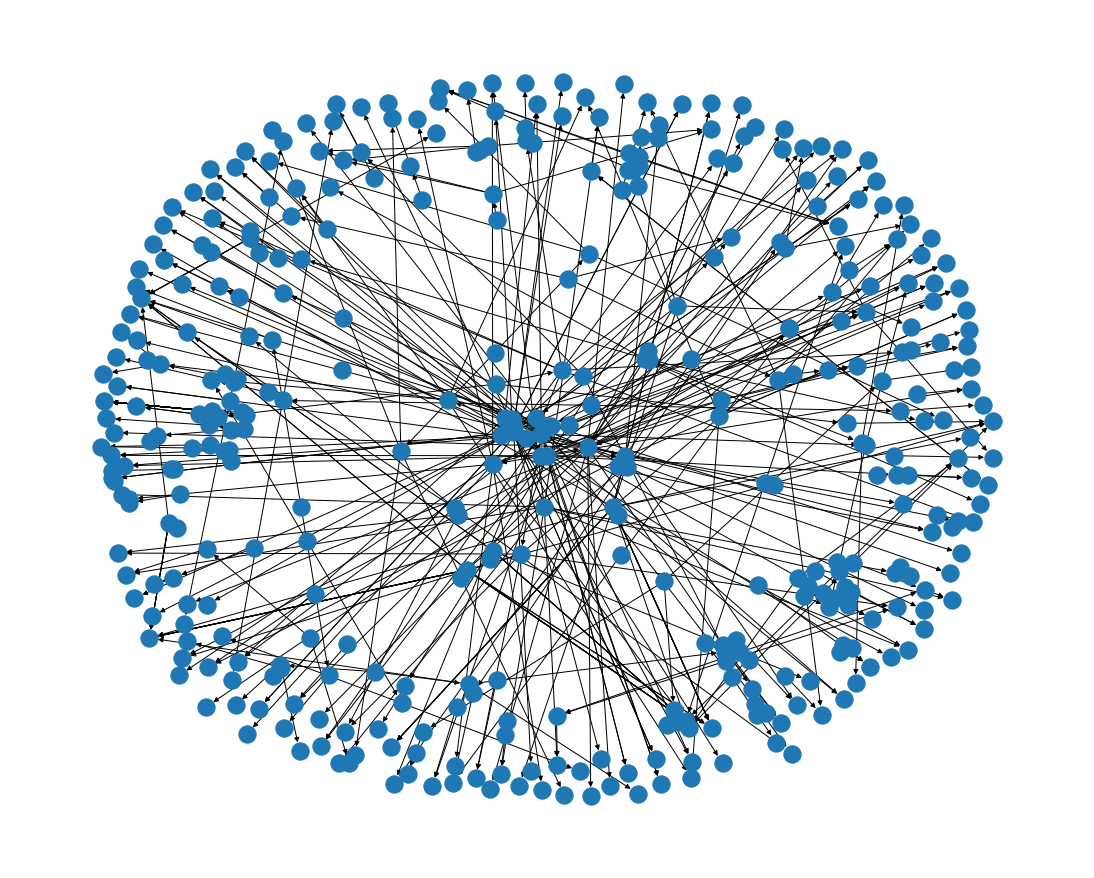

In [140]:
from matplotlib.pyplot import figure
figure(figsize=(15, 12))
nx.draw_spring(G, with_labels=False)

In [143]:
G = G.to_undirected()
[len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]

[287, 17, 17, 6, 6, 6, 5, 5, 5, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3]

In [144]:
graphs = list(nx.connected_component_subgraphs(G))

In [145]:
graphs

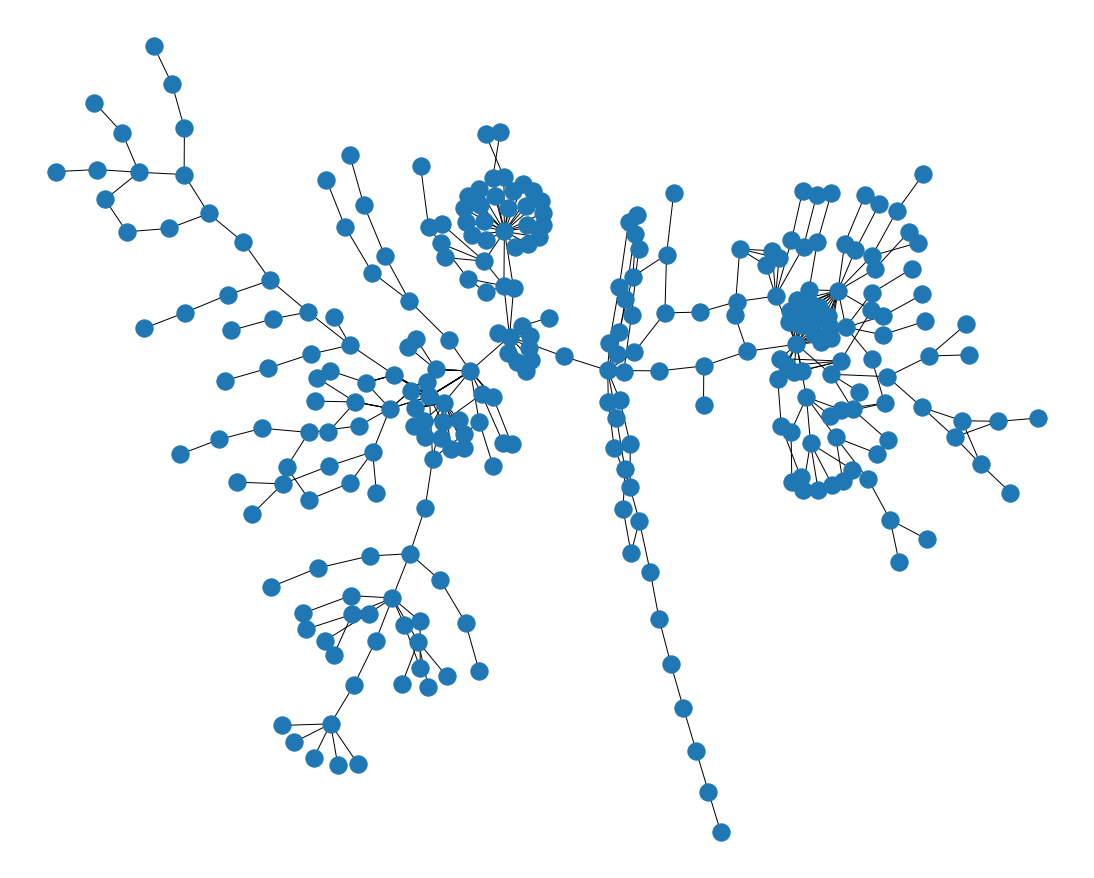

In [149]:
from matplotlib.pyplot import figure
figure(figsize=(15, 12))
nx.draw_kamada_kawai(graphs[0], with_labels=False)

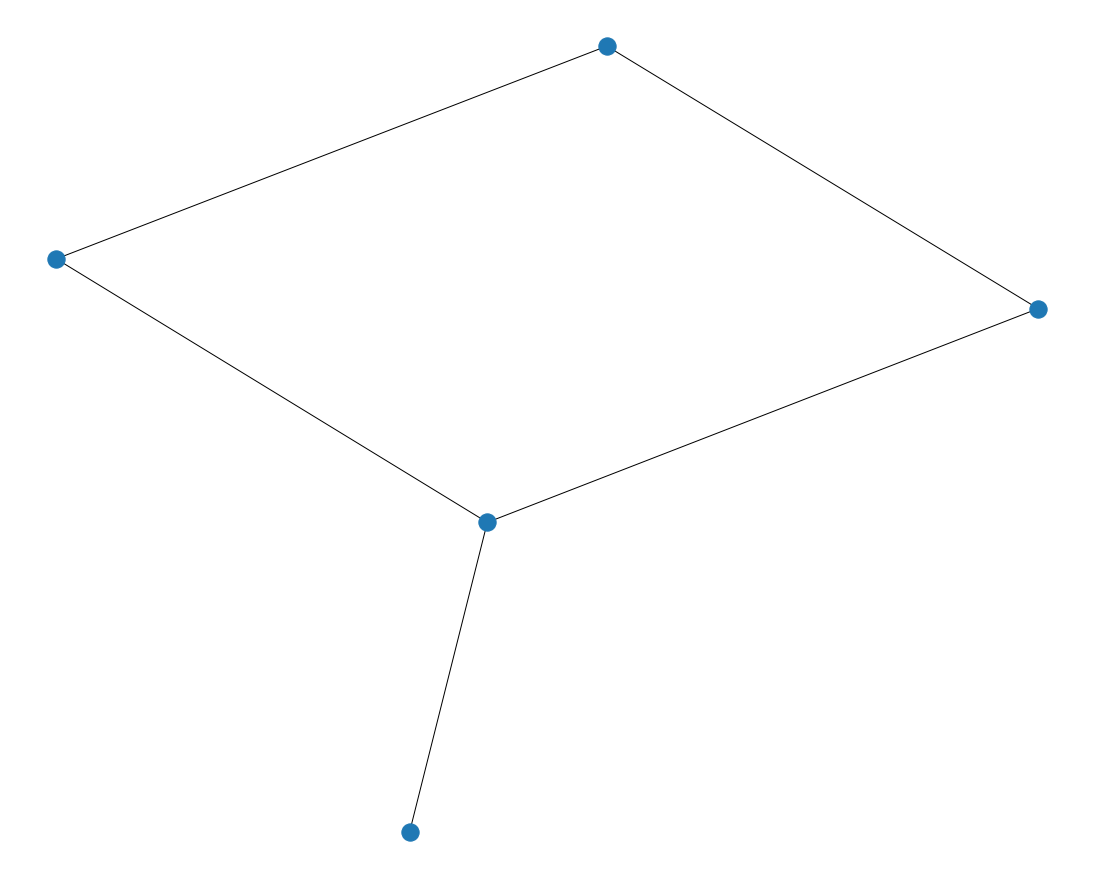

In [150]:
from matplotlib.pyplot import figure
figure(figsize=(15, 12))
nx.draw_kamada_kawai(graphs[1], with_labels=False)

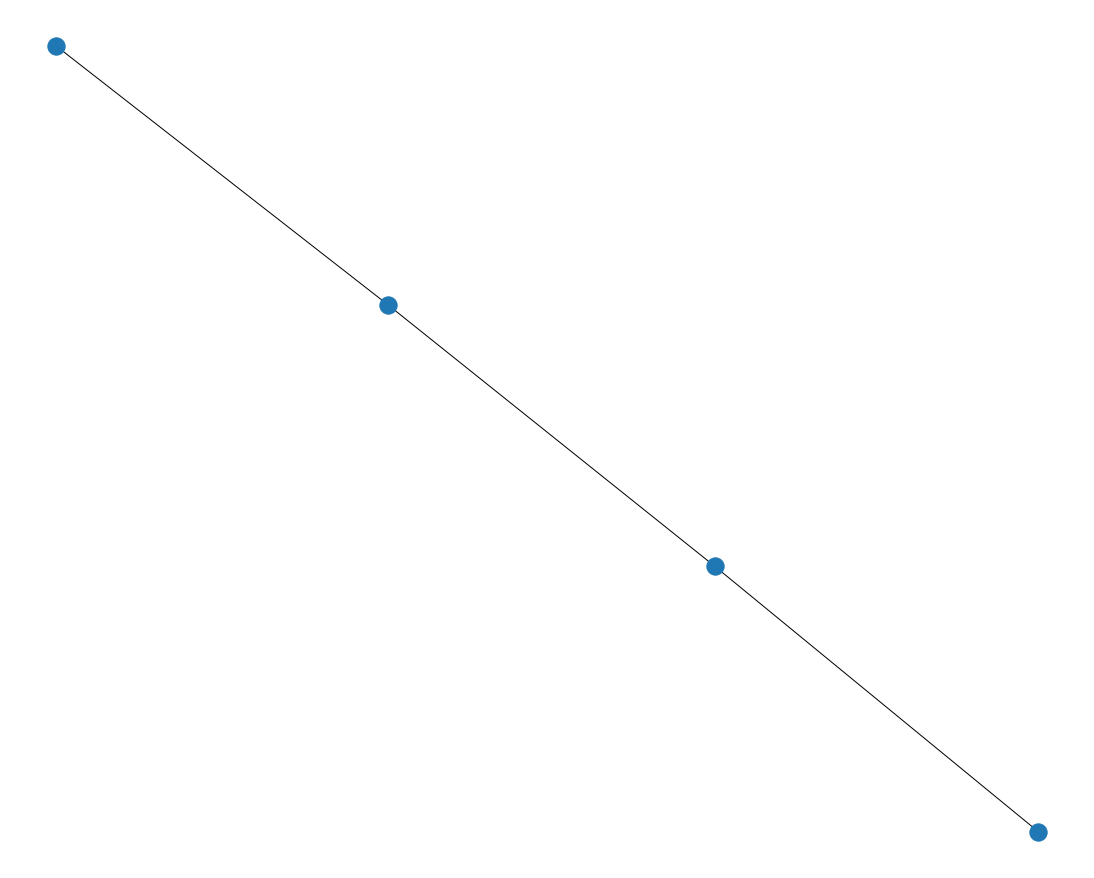

In [151]:
from matplotlib.pyplot import figure
figure(figsize=(15, 12))
nx.draw_kamada_kawai(graphs[2], with_labels=False)

In [122]:
# Convert the object to JSON
#graph_json = NetworkX.graph_to_json(G)

#with open("my_graph_small.json", "w") as f:
#    json.dump(graph_json, f)

In [123]:
list(nx.isolates(G))

[]

In [124]:
G.remove_nodes_from(list(nx.isolates(G)))

In [131]:
G = G.to_undirected()
G = nx.convert_node_labels_to_integers(G, first_label=0, ordering='default', label_attribute='Orig_Label')

In [132]:
list(G.nodes(data=True))

[(0,
  {'data': (<SysMonProc> process_guid={47ab858c-cadc-5eac-2200-000000000400}),
   'Orig_Label': 7605756678949184438}),
 (1,
  {'data': (<SysMonProc> process_guid={47ab858c-e589-5eac-f803-000000000400}),
   'Orig_Label': -6941030430542843715}),
 (2,
  {'data': (<SysMonProc> process_guid={47ab858c-e296-5eac-c803-000000000400}),
   'Orig_Label': 22487237678128871}),
 (3,
  {'data': (<SysMonProc> process_guid={47ab858c-e2d4-5eac-cd03-000000000400}),
   'Orig_Label': -8298811802184468840}),
 (4,
  {'data': (<SysMonProc> process_guid={47ab858c-e37a-5eac-e003-000000000400}),
   'Orig_Label': 2409123009262189569}),
 (5,
  {'data': (<SysMonProc> process_guid={47ab858c-e2d4-5eac-cc03-000000000400}),
   'Orig_Label': 5663724664859128389}),
 (6,
  {'data': (<SysMonProc> process_guid={47ab858c-e68a-5eac-0304-000000000400}),
   'Orig_Label': -1912919121846679210}),
 (7,
  {'data': (<File> host=SCRANTON.dmevals.local full_path=C:\Windows\System32\svchost.exe),
   'Orig_Label': -46763653583354037

In [128]:
list(G.edges.data())

[(7605756678949184438,
  -6941030430542843715,
  {'key': 'Launched',
   'data': {'timestamp': '2020-05-02 03:14:17.672'},
   'edge_name': 'Launched'}),
 (7605756678949184438,
  22487237678128871,
  {'key': 'Launched',
   'data': {'timestamp': '2020-05-02 03:01:42.046'},
   'edge_name': 'Launched'}),
 (7605756678949184438,
  -8298811802184468840,
  {'key': 'Launched',
   'data': {'timestamp': '2020-05-02 03:02:44.901'},
   'edge_name': 'Launched'}),
 (7605756678949184438,
  2409123009262189569,
  {'key': 'Launched',
   'data': {'timestamp': '2020-05-02 03:05:30.108'},
   'edge_name': 'Launched'}),
 (7605756678949184438,
  5663724664859128389,
  {'key': 'Launched',
   'data': {'timestamp': '2020-05-02 03:02:44.870'},
   'edge_name': 'Launched'}),
 (7605756678949184438,
  -1912919121846679210,
  {'key': 'Launched',
   'data': {'timestamp': '2020-05-02 03:18:34.907'},
   'edge_name': 'Launched'}),
 (7605756678949184438,
  -4676365358335403721,
  {'key': 'File Of', 'data': None, 'edge_name'

In [130]:
nx.is_connected(G)

False

In [129]:
from karateclub import LabelPropagation

model = LabelPropagation()
model.fit(G)
cluster_membership = model.get_memberships()

ValueError: Graph is not connected. Please see requirements.